In [1]:
import pandas as pd

# Load the data from the uploaded Excel file
file_path = 'C:/Users/as22dt/OneDrive - Florida State University/Analysis/Data/Real time Scenario/Data/Significant_Features_Scenario4.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Date,Sin(Day of Year),Cos(day of Year),E.coli,Water Temperature,Turbidity,Streamflow,Agricultural Area,Urban Area,Imperviousness,...,cum_rain_7_days_lag1,max_rain_7_days_lag1,ema_rain_7_days_lag1,rainfall_anomaly_lag1,seasonal_rainfall_deviation_lag1,dry_days_lag1,wet_days_lag1,Antecedent_Wet_Period_lag1,antecedent_dry_period_lag1,time_diff_days_global.1
0,2007-05-14,0.741222,-0.671260,35,13.5,2.5,21,0.08365,0.675702,0.253804,...,7.7,4.4,1.774460,-3.4223,-3.641115,0,0,0,8,4
1,2007-05-16,0.717677,-0.696376,30,11.2,2.6,21,0.08365,0.675702,0.253804,...,7.7,4.4,0.998134,-3.4223,-3.641115,2,0,0,10,2
2,2007-05-17,0.705584,-0.708627,77,10.8,3.7,22,0.08365,0.675702,0.253804,...,12.3,4.6,1.898600,1.1777,0.958885,0,1,1,11,1
3,2007-05-23,0.628763,-0.777597,74,11.0,1.7,24,0.08365,0.675702,0.253804,...,4.6,4.6,0.337910,-3.4223,-3.641115,5,0,0,17,2
4,2007-05-30,0.530730,-0.847541,150,11.4,2.4,28,0.08365,0.675702,0.253804,...,0.0,0.0,0.045106,-3.4223,-3.641115,12,0,0,24,7


In [2]:
# Remove rows with any missing values
df= data.dropna()

df.head()

,Date,Sin(Day of Year),Cos(day of Year),E.coli,Water Temperature,Turbidity,Streamflow,Agricultural Area,Urban Area,Imperviousness,...,cum_rain_7_days_lag1,max_rain_7_days_lag1,ema_rain_7_days_lag1,rainfall_anomaly_lag1,seasonal_rainfall_deviation_lag1,dry_days_lag1,wet_days_lag1,Antecedent_Wet_Period_lag1,antecedent_dry_period_lag1,time_diff_days_global.1
0,2007-05-14,0.741222,-0.671260,35,13.5,2.5,21,0.08365,0.675702,0.253804,...,7.7,4.4,1.774460,-3.4223,-3.641115,0,0,0,8,4
1,2007-05-16,0.717677,-0.696376,30,11.2,2.6,21,0.08365,0.675702,0.253804,...,7.7,4.4,0.998134,-3.4223,-3.641115,2,0,0,10,2
2,2007-05-17,0.705584,-0.708627,77,10.8,3.7,22,0.08365,0.675702,0.253804,...,12.3,4.6,1.898600,1.1777,0.958885,0,1,1,11,1
3,2007-05-23,0.628763,-0.777597,74,11.0,1.7,24,0.08365,0.675702,0.253804,...,4.6,4.6,0.337910,-3.4223,-3.641115,5,0,0,17,2
4,2007-05-30,0.530730,-0.847541,150,11.4,2.4,28,0.08365,0.675702,0.253804,...,0.0,0.0,0.045106,-3.4223,-3.641115,12,0,0,24,7


In [3]:
import numpy as np

# Drop rows with any missing values
data_cleaned = df.dropna()

# Transform the 'E.coli' column to log10 scale
data_cleaned['Log10_E.coli'] = np.log10(data_cleaned['E.coli'])

# Display the first few rows to confirm the transformation
data_cleaned[['E.coli', 'Log10_E.coli']].head()

,E.coli,Log10_E.coli
0,35,1.544068
1,30,1.477121
2,77,1.886491
3,74,1.869232
4,150,2.176091


In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select columns for standardization and normalization
features = data_cleaned.columns.difference(['E.coli', 'Log10_E.coli', 'Date'])

In [5]:
features

Index(['Agricultural Area', 'Air Temperature_lag1',
       'Antecedent_Wet_Period_lag1', 'Cos(day of Year)', 'Elevation',
       'Gage Height_lag1', 'Imperviousness', 'Precipitation_lag1',
       'Relative Humidity_lag1', 'Sin(Day of Year)', 'Slope',
       'Solar Radiation_lag1', 'Streamflow', 'Study_Area',
       'Topographic Wetness Index', 'Total Area', 'Turbidity',
       'Upstream Tributary Streamflow_lag1', 'Urban Area', 'Water Temperature',
       'Wind Speed_lag1', 'antecedent_dry_period_lag1', 'area_mn',
       'cum_rain_2_days_lag1', 'cum_rain_3_days_lag1', 'cum_rain_4_days_lag1',
       'cum_rain_5_days_lag1', 'cum_rain_6_days_lag1', 'cum_rain_7_days_lag1',
       'dry_days_lag1', 'ema_rain_7_days_lag1', 'entropy',
       'euclidean_nearest_neighbor_mn', 'fractal_dimension_mn',
       'max_rain_7_days_lag1', 'month', 'mutual_information', 'patch_density',
       'perimeter_area_ratio_mn', 'rainfall_anomaly_lag1',
       'relative_mutual_information', 'season',
       'seaso

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np
import pandas as pd

# Step 1: Use only Study_Area 1 and 2
train_test_pool = data_cleaned[data_cleaned['Study_Area'].isin([1, 2])].copy()

# Step 2: Sort by Date for time-series split
train_test_pool['Date'] = pd.to_datetime(train_test_pool['Date'])
train_test_pool = train_test_pool.sort_values('Date')

# Step 3: Time-based split (80% train, 20% test)
split_index = int(len(train_test_pool) * 0.7)
train_set = train_test_pool.iloc[:split_index].copy()
test_set = train_test_pool.iloc[split_index:].copy()

# Step 4: Prepare input features (exclude target and non-numeric features)
exclude_cols = ['Date', 'E.coli', 'Log10_E.coli']  # 'Study_Area' is excluded as it's not a feature
feature_cols = [col for col in train_set.columns if col not in exclude_cols and np.issubdtype(train_set[col].dtype, np.number)]

X_train = train_set[feature_cols]
X_test = test_set[feature_cols]

y_train = train_set['Log10_E.coli']
y_test = test_set['Log10_E.coli']

# Step 5: Apply transformations (Standardization, Normalization, Logarithmic, Robust Scaling)
# ... (Keep the same transformation code from the original snippet)
# Step 5: Prepare input features (exclude target and non-numeric features)
exclude_cols = ['Date', 'E.coli', 'Log10_E.coli']
feature_cols = [col for col in train_set.columns if col not in exclude_cols and np.issubdtype(train_set[col].dtype, np.number)]

X_train = train_set[feature_cols]
X_test = test_set[feature_cols]

y_train = train_set['Log10_E.coli']
y_test = test_set['Log10_E.coli']

# Step 6: Apply transformations

# Standardization
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Normalization
scaler_minmax = MinMaxScaler()
X_train_norm = scaler_minmax.fit_transform(X_train)
X_test_norm = scaler_minmax.transform(X_test)

# Log1p transformation: valid for x ≥ 0
X_train_log1p = np.log1p(X_train.where(X_train >= 0))
X_test_log1p = np.log1p(X_test.where(X_test >= 0))
# Replace -inf, inf, NaN with 0
X_train_log1p = X_train_log1p.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test_log1p = X_test_log1p.replace([np.inf, -np.inf], np.nan).fillna(0)
# Robust Scaling
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)
# Log10 transformation on X_train and X_test — apply safely to positive values
X_train_log10 = np.log10(X_train.where(X_train > 0))
X_test_log10 = np.log10(X_test.where(X_test > 0))

# Replace -inf, NaN with 0
X_train_log10 = X_train_log10.replace([-np.inf, np.inf], np.nan).fillna(0)
X_test_log10 = X_test_log10.replace([-np.inf, np.inf], np.nan).fillna(0)

# Show shape summary
{
    "Train size": X_train.shape,
    "Test size": X_test.shape,
    "Features used": len(feature_cols)
}

{'Train size': (451, 47), 'Test size': (194, 47), 'Features used': 47}

In [13]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

best_score = -float("inf")

for gamma in [0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    for learning_rate in [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7]:
        for max_depth in [3, 5, 7, 10]:
            for subsample in [0.8, 1.0]:
                for n_estimators in [50, 100, 200, 300]:
                    model = XGBRegressor(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='reg:squarederror',
                        n_jobs=-1,
                        random_state=42
                    )

                    model.fit(X_train_log1p, y_train)
                    y_pred = model.predict(X_test_log1p)
                    score = r2_score(y_test, y_pred)

                    if score > best_score:
                        best_score = score
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }

print("✅ Best R² Score: {:.4f}".format(best_score))
print("✅ Best Parameters:", best_params)
print("RMSE:", np.sqrt(mean_squared_error(y_test, best_model.predict(X_test_log1p))))
print("MAE:", mean_absolute_error(y_test, best_model.predict(X_test_log1p)))


✅ Best R² Score: 0.6160
✅ Best Parameters: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.8, 'n_estimators': 50}
RMSE: 0.4274821123139834
MAE: 0.3122603286698841


# Forward Selection SVR()

In [14]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

best_score = -float("inf")
best_feature_subset = None
selected_features = []

for num_features in range(1, len(feature_cols) + 1):
    print(f"\nTrying subsets of {num_features} features:")
    best_feature_this_round = None

    for feature in set(feature_cols) - set(selected_features):
        current_subset = selected_features + [feature]

        Xtrain_subset = X_train_log1p[current_subset]
        Xtest_subset = X_test_log1p[current_subset]

        model = XGBRegressor(random_state=42, n_jobs=-1)  #default XGBoost
        model.fit(Xtrain_subset, y_train)
        y_pred = model.predict(Xtest_subset)
        score = r2_score(y_test, y_pred)

        if score > best_score:
            best_score = score
            best_feature_subset = current_subset
            best_feature_this_round = feature

    if best_feature_this_round:
        selected_features = best_feature_subset

    print("Best R² so far: {:.4f}".format(best_score))
    print("Current best subset:", best_feature_subset)

print("\n✅ Final Best R²: {:.4f}".format(best_score))
print("✅ Final Best Subset:", best_feature_subset)



Trying subsets of 1 features:
Best R² so far: 0.2323
Current best subset: ['Turbidity']

Trying subsets of 2 features:
Best R² so far: 0.3494
Current best subset: ['Turbidity', 'perimeter_area_ratio_mn']

Trying subsets of 3 features:
Best R² so far: 0.4313
Current best subset: ['Turbidity', 'perimeter_area_ratio_mn', 'Cos(day of Year)']

Trying subsets of 4 features:
Best R² so far: 0.4823
Current best subset: ['Turbidity', 'perimeter_area_ratio_mn', 'Cos(day of Year)', 'Water Temperature']

Trying subsets of 5 features:
Best R² so far: 0.5460
Current best subset: ['Turbidity', 'perimeter_area_ratio_mn', 'Cos(day of Year)', 'Water Temperature', 'Precipitation_lag1']

Trying subsets of 6 features:
Best R² so far: 0.5706
Current best subset: ['Turbidity', 'perimeter_area_ratio_mn', 'Cos(day of Year)', 'Water Temperature', 'Precipitation_lag1', 'Upstream Tributary Streamflow_lag1']

Trying subsets of 7 features:
Best R² so far: 0.5760
Current best subset: ['Turbidity', 'perimeter_area_r

In [15]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

final_features =['Turbidity', 'perimeter_area_ratio_mn', 'Cos(day of Year)', 'Water Temperature', 'Precipitation_lag1', 
                 'Upstream Tributary Streamflow_lag1', 'cum_rain_3_days_lag1', 'Wind Speed_lag1']

# Use only selected features
Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]

best_score = -float("inf")
best_model = None
best_params = None

for gamma in [0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    for learning_rate in [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7]:
        for max_depth in [3, 5, 7, 10]:
            for subsample in [0.8, 1.0]:
                for n_estimators in [50, 100, 200, 300]:
                    model = XGBRegressor(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='reg:squarederror',
                        n_jobs=-1,
                        random_state=42
                    )

                    # Train on selected features
                    model.fit(Xtrain, y_train)
                    y_pred = model.predict(Xtest)
                    score = r2_score(y_test, y_pred)

                    if score > best_score:
                        best_score = score
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }

print("✅ Best R² Score: {:.4f}".format(best_score))
print("✅ Best Parameters:", best_params)


✅ Best R² Score: 0.5927
✅ Best Parameters: {'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 10, 'subsample': 0.8, 'n_estimators': 50}


# Forward(+)

In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

best_score = -float("inf")
best_feature_subset = None
selected_features = []

for num_features in range(1, len(feature_cols) + 1):
    print(f"\nTrying subsets of {num_features} features:")
    best_feature_this_round = None

    for feature in set(feature_cols) - set(selected_features):
        current_subset = selected_features + [feature]

        Xtrain_subset = X_train_log1p[current_subset]
        Xtest_subset = X_test_log1p[current_subset]

        model = XGBRegressor(gamma=0.1, learning_rate=0.5, max_depth=10, subsample=0.8, n_estimators=50, random_state=42, n_jobs=-1)  #default XGBoost
        model.fit(Xtrain_subset, y_train)
        y_pred = model.predict(Xtest_subset)
        score = r2_score(y_test, y_pred)

        if score > best_score:
            best_score = score
            best_feature_subset = current_subset
            best_feature_this_round = feature

    if best_feature_this_round:
        selected_features = best_feature_subset

    print("Best R² so far: {:.4f}".format(best_score))
    print("Current best subset:", best_feature_subset)

print("\n✅ Final Best R²: {:.4f}".format(best_score))
print("✅ Final Best Subset:", best_feature_subset)



Trying subsets of 1 features:
Best R² so far: 0.2889
Current best subset: ['Turbidity']

Trying subsets of 2 features:
Best R² so far: 0.3906
Current best subset: ['Turbidity', 'Topographic Wetness Index']

Trying subsets of 3 features:
Best R² so far: 0.4783
Current best subset: ['Turbidity', 'Topographic Wetness Index', 'month']

Trying subsets of 4 features:
Best R² so far: 0.5660
Current best subset: ['Turbidity', 'Topographic Wetness Index', 'month', 'perimeter_area_ratio_mn']

Trying subsets of 5 features:
Best R² so far: 0.5722
Current best subset: ['Turbidity', 'Topographic Wetness Index', 'month', 'perimeter_area_ratio_mn', 'ema_rain_7_days_lag1']

Trying subsets of 6 features:
Best R² so far: 0.5978
Current best subset: ['Turbidity', 'Topographic Wetness Index', 'month', 'perimeter_area_ratio_mn', 'ema_rain_7_days_lag1', 'cum_rain_7_days_lag1']

Trying subsets of 7 features:
Best R² so far: 0.6019
Current best subset: ['Turbidity', 'Topographic Wetness Index', 'month', 'peri

In [18]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

final_features = ['Turbidity', 'Topographic Wetness Index', 'month', 'perimeter_area_ratio_mn', 'ema_rain_7_days_lag1', 'cum_rain_7_days_lag1',
                  'relative_mutual_information']

# Use only selected features
Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]

best_score = -float("inf")
best_model = None
best_params = None

for gamma in [0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    for learning_rate in [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7]:
        for max_depth in [3, 5, 7, 10]:
            for subsample in [0.8, 1.0]:
                for n_estimators in [50, 100, 200, 300]:
                    model = XGBRegressor(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='reg:squarederror',
                        n_jobs=-1,
                        random_state=42
                    )

                    # Train on selected features
                    model.fit(Xtrain, y_train)
                    y_pred = model.predict(Xtest)
                    score = r2_score(y_test, y_pred)

                    if score > best_score:
                        best_score = score
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }

print("✅ Best R² Score: {:.4f}".format(best_score))
print("✅ Best Parameters:", best_params)


✅ Best R² Score: 0.6019
✅ Best Parameters: {'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 10, 'subsample': 0.8, 'n_estimators': 50}


In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


final_features = ['Turbidity', 'Topographic Wetness Index', 'month', 'perimeter_area_ratio_mn', 'ema_rain_7_days_lag1', 'cum_rain_7_days_lag1',
                  'relative_mutual_information']
# Use only selected features
Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]

best_score = -float("inf")
best_model = None
best_params = None

for gamma in [0.05,0.06,0.07,0.08,0.09, 0.1,0.12,01.3,0.14,0.15,0.16,0.17,0.18,0.19 ]:
    for learning_rate in [0.3,0.4,0.5,0.6,0.7]:
        for max_depth in [8,9,10,11,12,20,30,40,50]:
            for subsample in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
                for n_estimators in [10,20,30,40,45,46,47,48,49,50,51,52,53,54,55,60,70,80,90]:
                    model = XGBRegressor(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='reg:squarederror',
                        n_jobs=-1,
                        random_state=42
                    )

                    # Train on selected features
                    model.fit(Xtrain, y_train)
                    y_pred = model.predict(Xtest)
                    score = r2_score(y_test, y_pred)

                    if score > best_score:
                        best_score = score
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }

print("✅ Best R² Score: {:.4f}".format(best_score))
print("✅ Best Parameters:", best_params)


✅ Best R² Score: 0.6156
✅ Best Parameters: {'gamma': 0.15, 'learning_rate': 0.5, 'max_depth': 9, 'subsample': 0.5, 'n_estimators': 60}


In [21]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

best_score = -float("inf")
best_feature_subset = None
selected_features = []

for num_features in range(1, len(feature_cols) + 1):
    print(f"\nTrying subsets of {num_features} features:")
    best_feature_this_round = None

    for feature in set(feature_cols) - set(selected_features):
        current_subset = selected_features + [feature]

        Xtrain_subset = X_train_log1p[current_subset]
        Xtest_subset = X_test_log1p[current_subset]

        model = XGBRegressor(gamma=0.15, learning_rate=0.5, max_depth=9, subsample=0.8, n_estimators=60, random_state=42, n_jobs=-1)  #default XGBoost
        model.fit(Xtrain_subset, y_train)
        y_pred = model.predict(Xtest_subset)
        score = r2_score(y_test, y_pred)

        if score > best_score:
            best_score = score
            best_feature_subset = current_subset
            best_feature_this_round = feature

    if best_feature_this_round:
        selected_features = best_feature_subset

    print("Best R² so far: {:.4f}".format(best_score))
    print("Current best subset:", best_feature_subset)

print("\n✅ Final Best R²: {:.4f}".format(best_score))
print("✅ Final Best Subset:", best_feature_subset)



Trying subsets of 1 features:
Best R² so far: 0.3165
Current best subset: ['Turbidity']

Trying subsets of 2 features:
Best R² so far: 0.4428
Current best subset: ['Turbidity', 'perimeter_area_ratio_mn']

Trying subsets of 3 features:
Best R² so far: 0.4919
Current best subset: ['Turbidity', 'perimeter_area_ratio_mn', 'Water Temperature']

Trying subsets of 4 features:
Best R² so far: 0.5319
Current best subset: ['Turbidity', 'perimeter_area_ratio_mn', 'Water Temperature', 'Cos(day of Year)']

Trying subsets of 5 features:
Best R² so far: 0.5437
Current best subset: ['Turbidity', 'perimeter_area_ratio_mn', 'Water Temperature', 'Cos(day of Year)', 'rainfall_anomaly_lag1']

Trying subsets of 6 features:
Best R² so far: 0.5562
Current best subset: ['Turbidity', 'perimeter_area_ratio_mn', 'Water Temperature', 'Cos(day of Year)', 'rainfall_anomaly_lag1', 'time_diff_days_global.1']

Trying subsets of 7 features:
Best R² so far: 0.5756
Current best subset: ['Turbidity', 'perimeter_area_ratio

In [22]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

final_features = ['Turbidity', 'perimeter_area_ratio_mn', 'Water Temperature', 'Cos(day of Year)', 'rainfall_anomaly_lag1', 'time_diff_days_global.1',
                  'patch_density', 'cum_rain_6_days_lag1', 'cum_rain_4_days_lag1', 'shape_index_mn']

# Use only selected features
Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]

best_score = -float("inf")
best_model = None
best_params = None

for gamma in [0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    for learning_rate in [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7]:
        for max_depth in [3, 5, 7, 10]:
            for subsample in [0.8, 1.0]:
                for n_estimators in [50, 100, 200, 300]:
                    model = XGBRegressor(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='reg:squarederror',
                        n_jobs=-1,
                        random_state=42
                    )

                    # Train on selected features
                    model.fit(Xtrain, y_train)
                    y_pred = model.predict(Xtest)
                    score = r2_score(y_test, y_pred)

                    if score > best_score:
                        best_score = score
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }

print("✅ Best R² Score: {:.4f}".format(best_score))
print("✅ Best Parameters:", best_params)


✅ Best R² Score: 0.6061
✅ Best Parameters: {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'subsample': 0.8, 'n_estimators': 50}


In [24]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

best_score = -float("inf")
best_feature_subset = None
selected_features = []

for num_features in range(1, len(feature_cols) + 1):
    print(f"\nTrying subsets of {num_features} features:")
    best_feature_this_round = None

    for feature in set(feature_cols) - set(selected_features):
        current_subset = selected_features + [feature]

        Xtrain_subset = X_train_log1p[current_subset]
        Xtest_subset = X_test_log1p[current_subset]

        model = XGBRegressor(gamma=0.17, learning_rate=0.5, max_depth=2, subsample=0.5, n_estimators=51, random_state=42, n_jobs=-1)
        model.fit(Xtrain_subset, y_train)
        y_pred = model.predict(Xtest_subset)
        score = r2_score(y_test, y_pred)
        
        if score > best_score:
            best_score = score
            best_feature_subset = current_subset
            best_feature_this_round = feature

    if best_feature_this_round:
        selected_features = best_feature_subset

    print("Best R² so far: {:.4f}".format(best_score))
    print("Current best subset:", best_feature_subset)

print("\n✅ Final Best R²: {:.4f}".format(best_score))
print("✅ Final Best Subset:", best_feature_subset)



Trying subsets of 1 features:
Best R² so far: 0.3539
Current best subset: ['Turbidity']

Trying subsets of 2 features:
Best R² so far: 0.4724
Current best subset: ['Turbidity', 'fractal_dimension_mn']

Trying subsets of 3 features:
Best R² so far: 0.5524
Current best subset: ['Turbidity', 'fractal_dimension_mn', 'month']

Trying subsets of 4 features:
Best R² so far: 0.6176
Current best subset: ['Turbidity', 'fractal_dimension_mn', 'month', 'antecedent_dry_period_lag1']

Trying subsets of 5 features:
Best R² so far: 0.6406
Current best subset: ['Turbidity', 'fractal_dimension_mn', 'month', 'antecedent_dry_period_lag1', 'time_diff_days_global.1']

Trying subsets of 6 features:
Best R² so far: 0.6466
Current best subset: ['Turbidity', 'fractal_dimension_mn', 'month', 'antecedent_dry_period_lag1', 'time_diff_days_global.1', 'dry_days_lag1']

Trying subsets of 7 features:
Best R² so far: 0.6466
Current best subset: ['Turbidity', 'fractal_dimension_mn', 'month', 'antecedent_dry_period_lag1

In [25]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

final_features = ['Turbidity', 'fractal_dimension_mn', 'month', 'antecedent_dry_period_lag1', 'time_diff_days_global.1', 'dry_days_lag1']

# Use only selected features
Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]

best_score = -float("inf")
best_model = None
best_params = None

for gamma in [0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    for learning_rate in [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7]:
        for max_depth in [3, 5, 7, 10]:
            for subsample in [0.8, 1.0]:
                for n_estimators in [50, 100, 200, 300]:
                    model = XGBRegressor(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='reg:squarederror',
                        n_jobs=-1,
                        random_state=42
                    )

                    # Train on selected features
                    model.fit(Xtrain, y_train)
                    y_pred = model.predict(Xtest)
                    score = r2_score(y_test, y_pred)

                    if score > best_score:
                        best_score = score
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }

print("✅ Best R² Score: {:.4f}".format(best_score))
print("✅ Best Parameters:", best_params)


✅ Best R² Score: 0.6296
✅ Best Parameters: {'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8, 'n_estimators': 300}


In [26]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


final_features = ['Turbidity', 'fractal_dimension_mn', 'month', 'antecedent_dry_period_lag1', 'time_diff_days_global.1', 'dry_days_lag1']

# Use only selected features
Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]

best_score = -float("inf")
best_model = None
best_params = None

for gamma in [0.005,0.006,0.007,0.008,0.009, 0.01,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.019,0.02,0.03,0.04 ]:
    for learning_rate in [0.05,0.06,0.07,0.08,0.09, 0.1,0.12,01.3,0.14,0.15,0.16,0.17,0.18,0.19]:
        for max_depth in [89,10,12,15,20,30,40,50,100]:
            for subsample in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
                for n_estimators in [250,280,300,350,400,500,600,700]:
                    model = XGBRegressor(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='reg:squarederror',
                        n_jobs=-1,
                        random_state=42
                    )

                    # Train on selected features
                    model.fit(Xtrain, y_train)
                    y_pred = model.predict(Xtest)
                    score = r2_score(y_test, y_pred)

                    if score > best_score:
                        best_score = score
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }

print("✅ Best R² Score: {:.4f}".format(best_score))
print("✅ Best Parameters:", best_params)


✅ Best R² Score: 0.6391
✅ Best Parameters: {'gamma': 0.04, 'learning_rate': 0.05, 'max_depth': 12, 'subsample': 0.2, 'n_estimators': 350}


In [30]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


final_features = ['Turbidity', 'fractal_dimension_mn', 'month', 'antecedent_dry_period_lag1', 'time_diff_days_global.1', 'dry_days_lag1']

# Use only selected features
Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]

best_score = -float("inf")
best_model = None
best_params = None

for gamma in [0.04]:
    for learning_rate in [0.05]:
        for max_depth in [12]:
            for subsample in [0.2]:
                for n_estimators in [345,346,347,348,349,350,361,362,363,364,365]:
                    model = XGBRegressor(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='reg:squarederror',
                        n_jobs=-1,
                        random_state=42
                    )

                    # Train on selected features
                    model.fit(Xtrain, y_train)
                    y_pred = model.predict(Xtest)
                    score = r2_score(y_test, y_pred)

                    if score > best_score:
                        best_score = score
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }

print("✅ Best R² Score: {:.4f}".format(best_score))
print("✅ Best Parameters:", best_params)


✅ Best R² Score: 0.6391
✅ Best Parameters: {'gamma': 0.04, 'learning_rate': 0.05, 'max_depth': 12, 'subsample': 0.2, 'n_estimators': 348}


In [32]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


final_features = ['Turbidity', 'fractal_dimension_mn', 'month', 'antecedent_dry_period_lag1', 'time_diff_days_global.1', 'dry_days_lag1']

Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]
model = XGBRegressor(gamma=0.04, learning_rate=0.05, max_depth=12, subsample=0.2, n_estimators=348, random_state=42, n_jobs=-1) 
model.fit(Xtrain, y_train)

y_predict_xtrain = model.predict(Xtrain)
y_predict_xtest = model.predict(Xtest)
 
score_train = metrics.r2_score(y_train, y_predict_xtrain)
score_test = metrics.r2_score(y_test, y_predict_xtest)
MAE_train = metrics.mean_absolute_error(y_train, y_predict_xtrain)
MAE_test = metrics.mean_absolute_error(y_test, y_predict_xtest)
MSE_train = metrics.mean_squared_error(y_train, y_predict_xtrain)
MSE_test = metrics.mean_squared_error(y_test, y_predict_xtest)
MAPE_train = metrics.mean_absolute_percentage_error(y_train, y_predict_xtrain)
MAPE_test = metrics.mean_absolute_percentage_error(y_test, y_predict_xtest)

print('SVR Evaluation')
print('R2 for train:', score_train)
print('R2 for test:', score_test)
print('MAE for train:', MAE_train)
print('MAE for test:', MAE_test)
print('MSE for train:', MSE_train)
print('MSE for test:', MSE_test)
print('MAPE for train:', MAPE_train)
print('MAPE for test:', MAPE_test)

SVR Evaluation
R2 for train: 0.9473938786935621
R2 for test: 0.6390909437028927
MAE for train: 0.10713721218252119
MAE for test: 0.2954790594314842
MSE for train: 0.019553605139516813
MSE for test: 0.1717324858438853
MAPE for train: 0.05853532783881052
MAPE for test: 0.13372133540203363


In [33]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

best_score = -float("inf")
best_feature_subset = None
selected_features = []

for num_features in range(1, len(feature_cols) + 1):
    print(f"\nTrying subsets of {num_features} features:")
    best_feature_this_round = None

    for feature in set(feature_cols) - set(selected_features):
        current_subset = selected_features + [feature]

        Xtrain_subset = X_train_log1p[current_subset]
        Xtest_subset = X_test_log1p[current_subset]

        model = XGBRegressor(gamma=0.04, learning_rate=0.05, max_depth=12, subsample=0.2, n_estimators=348, random_state=42, n_jobs=-1)  #default XGBoost
        model.fit(Xtrain_subset, y_train)
        y_pred = model.predict(Xtest_subset)
        score = r2_score(y_test, y_pred)
        
        if score > best_score:
            best_score = score
            best_feature_subset = current_subset
            best_feature_this_round = feature

    if best_feature_this_round:
        selected_features = best_feature_subset

    print("Best R² so far: {:.4f}".format(best_score))
    print("Current best subset:", best_feature_subset)

print("\n✅ Final Best R²: {:.4f}".format(best_score))
print("✅ Final Best Subset:", best_feature_subset)



Trying subsets of 1 features:
Best R² so far: 0.2739
Current best subset: ['Turbidity']

Trying subsets of 2 features:
Best R² so far: 0.4180
Current best subset: ['Turbidity', 'fractal_dimension_mn']

Trying subsets of 3 features:
Best R² so far: 0.5415
Current best subset: ['Turbidity', 'fractal_dimension_mn', 'month']

Trying subsets of 4 features:
Best R² so far: 0.6014
Current best subset: ['Turbidity', 'fractal_dimension_mn', 'month', 'seasonal_rainfall_deviation_lag1']

Trying subsets of 5 features:
Best R² so far: 0.6162
Current best subset: ['Turbidity', 'fractal_dimension_mn', 'month', 'seasonal_rainfall_deviation_lag1', 'cum_rain_4_days_lag1']

Trying subsets of 6 features:
Best R² so far: 0.6277
Current best subset: ['Turbidity', 'fractal_dimension_mn', 'month', 'seasonal_rainfall_deviation_lag1', 'cum_rain_4_days_lag1', 'relative_mutual_information']

Trying subsets of 7 features:
Best R² so far: 0.6302
Current best subset: ['Turbidity', 'fractal_dimension_mn', 'month', '

In [34]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

final_features = ['Turbidity', 'fractal_dimension_mn', 'month', 'seasonal_rainfall_deviation_lag1', 'cum_rain_4_days_lag1', 
                  'relative_mutual_information', 'Water Temperature', 'Antecedent_Wet_Period_lag1', 'time_diff_days_global.1', 'area_mn', 
                  'cum_rain_6_days_lag1']

# Use only selected features
Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]

best_score = -float("inf")
best_model = None
best_params = None

for gamma in [0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    for learning_rate in [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7]:
        for max_depth in [3, 5, 7, 10]:
            for subsample in [0.8, 1.0]:
                for n_estimators in [50, 100, 200, 300]:
                    model = XGBRegressor(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='reg:squarederror',
                        n_jobs=-1,
                        random_state=42
                    )

                    # Train on selected features
                    model.fit(Xtrain, y_train)
                    y_pred = model.predict(Xtest)
                    score = r2_score(y_test, y_pred)

                    if score > best_score:
                        best_score = score
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }

print("✅ Best R² Score: {:.4f}".format(best_score))
print("✅ Best Parameters:", best_params)


✅ Best R² Score: 0.6366
✅ Best Parameters: {'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 3, 'subsample': 0.8, 'n_estimators': 200}


In [35]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


final_features = ['Turbidity', 'fractal_dimension_mn', 'month', 'seasonal_rainfall_deviation_lag1', 'cum_rain_4_days_lag1', 
                  'relative_mutual_information', 'Water Temperature', 'Antecedent_Wet_Period_lag1', 'time_diff_days_global.1', 'area_mn', 
                  'cum_rain_6_days_lag1']

# Use only selected features
Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]

best_score = -float("inf")
best_model = None
best_params = None

for gamma in [0.005,0.006,0.007,0.008,0.009,0.01,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.019,0.02,0.03,0.04,0.05,0.06,0.07,
              0.08,0.09]:
    for learning_rate in [0.15,0.16,0.17,0.18,0.19, 0.2,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29]:
        for max_depth in [1,2,3,4,5]:
            for subsample in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
                for n_estimators in [150,180,200,230,250,300]:
                    model = XGBRegressor(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='reg:squarederror',
                        n_jobs=-1,
                        random_state=42
                    )

                    # Train on selected features
                    model.fit(Xtrain, y_train)
                    y_pred = model.predict(Xtest)
                    score = r2_score(y_test, y_pred)

                    if score > best_score:
                        best_score = score
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }

print("✅ Best R² Score: {:.4f}".format(best_score))
print("✅ Best Parameters:", best_params)


✅ Best R² Score: 0.6657
✅ Best Parameters: {'gamma': 0.05, 'learning_rate': 0.19, 'max_depth': 3, 'subsample': 0.6, 'n_estimators': 230}


In [38]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


final_features = ['Turbidity', 'fractal_dimension_mn', 'month', 'seasonal_rainfall_deviation_lag1', 'cum_rain_4_days_lag1', 
                  'relative_mutual_information', 'Water Temperature', 'Antecedent_Wet_Period_lag1', 'time_diff_days_global.1', 'area_mn', 
                  'cum_rain_6_days_lag1']

# Use only selected features
Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]

best_score = -float("inf")
best_model = None
best_params = None

for gamma in [0.05,0.051]:
    for learning_rate in [0.19]:
        for max_depth in [3]:
            for subsample in [0.6]:
                for n_estimators in [221,222,223,224,225,226,227,228,229,230]:
                    model = XGBRegressor(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='reg:squarederror',
                        n_jobs=-1,
                        random_state=42
                    )

                    # Train on selected features
                    model.fit(Xtrain, y_train)
                    y_pred = model.predict(Xtest)
                    score = r2_score(y_test, y_pred)

                    if score > best_score:
                        best_score = score
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }

print("✅ Best R² Score: {:.4f}".format(best_score))
print("✅ Best Parameters:", best_params)


✅ Best R² Score: 0.6668
✅ Best Parameters: {'gamma': 0.05, 'learning_rate': 0.19, 'max_depth': 3, 'subsample': 0.6, 'n_estimators': 226}


In [39]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


final_features = ['Turbidity', 'fractal_dimension_mn', 'month', 'seasonal_rainfall_deviation_lag1', 'cum_rain_4_days_lag1', 
                  'relative_mutual_information', 'Water Temperature', 'Antecedent_Wet_Period_lag1', 'time_diff_days_global.1', 'area_mn', 
                  'cum_rain_6_days_lag1']

Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]
model = XGBRegressor(gamma=0.05, learning_rate=0.19, max_depth=3, subsample=0.6, n_estimators=226, random_state=42, n_jobs=-1) 
model.fit(Xtrain, y_train)

y_predict_xtrain = model.predict(Xtrain)
y_predict_xtest = model.predict(Xtest)
 
score_train = metrics.r2_score(y_train, y_predict_xtrain)
score_test = metrics.r2_score(y_test, y_predict_xtest)
MAE_train = metrics.mean_absolute_error(y_train, y_predict_xtrain)
MAE_test = metrics.mean_absolute_error(y_test, y_predict_xtest)
MSE_train = metrics.mean_squared_error(y_train, y_predict_xtrain)
MSE_test = metrics.mean_squared_error(y_test, y_predict_xtest)
MAPE_train = metrics.mean_absolute_percentage_error(y_train, y_predict_xtrain)
MAPE_test = metrics.mean_absolute_percentage_error(y_test, y_predict_xtest)

print('SVR Evaluation')
print('R2 for train:', score_train)
print('R2 for test:', score_test)
print('MAE for train:', MAE_train)
print('MAE for test:', MAE_test)
print('MSE for train:', MSE_train)
print('MSE for test:', MSE_test)
print('MAPE for train:', MAPE_train)
print('MAPE for test:', MAPE_test)

SVR Evaluation
R2 for train: 0.9586958657144771
R2 for test: 0.6668284426529731
MAE for train: 0.09644511877160611
MAE for test: 0.29570193326966887
MSE for train: 0.01535267593183786
MSE for test: 0.15853406490465524
MAPE for train: 0.05449057899824944
MAPE for test: 0.13468077827844663


# Forward (parameter)

In [41]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

best_score = -float("inf")
best_feature_subset = None
selected_features = []

for num_features in range(1, len(feature_cols) + 1):
    print(f"\nTrying subsets of {num_features} features:")
    best_feature_this_round = None

    for feature in set(feature_cols) - set(selected_features):
        current_subset = selected_features + [feature]

        Xtrain_subset = X_train_log1p[current_subset]
        Xtest_subset = X_test_log1p[current_subset]

        model = XGBRegressor(gamma=0, learning_rate=0.2, max_depth=5, subsample=0.8, n_estimators=50, random_state=42, n_jobs=-1)  #default XGBoost
        model.fit(Xtrain_subset, y_train)
        y_pred = model.predict(Xtest_subset)
        score = r2_score(y_test, y_pred)
        
        if score > best_score:
            best_score = score
            best_feature_subset = current_subset
            best_feature_this_round = feature

    if best_feature_this_round:
        selected_features = best_feature_subset

    print("Best R² so far: {:.4f}".format(best_score))
    print("Current best subset:", best_feature_subset)

print("\n✅ Final Best R²: {:.4f}".format(best_score))
print("✅ Final Best Subset:", best_feature_subset)



Trying subsets of 1 features:
Best R² so far: 0.2844
Current best subset: ['Turbidity']

Trying subsets of 2 features:
Best R² so far: 0.4121
Current best subset: ['Turbidity', 'fractal_dimension_mn']

Trying subsets of 3 features:
Best R² so far: 0.5527
Current best subset: ['Turbidity', 'fractal_dimension_mn', 'month']

Trying subsets of 4 features:
Best R² so far: 0.5822
Current best subset: ['Turbidity', 'fractal_dimension_mn', 'month', 'seasonal_rainfall_deviation_lag1']

Trying subsets of 5 features:
Best R² so far: 0.5981
Current best subset: ['Turbidity', 'fractal_dimension_mn', 'month', 'seasonal_rainfall_deviation_lag1', 'time_diff_days_global.1']

Trying subsets of 6 features:
Best R² so far: 0.6197
Current best subset: ['Turbidity', 'fractal_dimension_mn', 'month', 'seasonal_rainfall_deviation_lag1', 'time_diff_days_global.1', 'dry_days_lag1']

Trying subsets of 7 features:
Best R² so far: 0.6197
Current best subset: ['Turbidity', 'fractal_dimension_mn', 'month', 'seasonal

# Backward Elimination SVR(

In [42]:
# Use all features from your full preprocessed set
features = X_train_log1p.columns.tolist()

Xtrain = X_train_log1p[features]
Xtest = X_test_log1p[features]
Ytrain = y_train
Ytest = y_test

In [43]:
all_features = set(features)
selected_features = all_features.copy()
best_score = -np.inf
best_feature_subset = selected_features.copy()

for num_features in range(len(features), 0, -1):
    print(f"\nTrying subsets of {num_features} features:")
    current_features = selected_features.copy()

    for feature in current_features:
        current_subset = selected_features if (len(selected_features) == len(all_features) and num_features == len(features)) else selected_features - {feature}

        Xtrain_subset = Xtrain[list(current_subset)]
        Xtest_subset = Xtest[list(current_subset)]

        model = XGBRegressor()
        model.fit(Xtrain_subset, Ytrain)
        score = model.score(Xtest_subset, Ytest)

        if score > best_score:
            best_score = score
            best_feature_subset = current_subset.copy()

    selected_features = best_feature_subset.copy()
    print("Best R²: {:.4f}".format(best_score))
    print("Best feature subset:", best_feature_subset)




Trying subsets of 47 features:
Best R²: 0.5372
Best feature subset: {'Streamflow', 'perimeter_area_ratio_mn', 'cum_rain_2_days_lag1', 'ema_rain_7_days_lag1', 'month', 'Topographic Wetness Index', 'Imperviousness', 'cum_rain_5_days_lag1', 'cum_rain_3_days_lag1', 'Water Temperature', 'Air Temperature_lag1', 'shape_index_mn', 'Cos(day of Year)', 'max_rain_7_days_lag1', 'Total Area', 'Urban Area', 'fractal_dimension_mn', 'Relative Humidity_lag1', 'Precipitation_lag1', 'mutual_information', 'Upstream Tributary Streamflow_lag1', 'rainfall_anomaly_lag1', 'Wind Speed_lag1', 'relative_mutual_information', 'season', 'dry_days_lag1', 'cum_rain_4_days_lag1', 'Study_Area', 'cum_rain_6_days_lag1', 'Antecedent_Wet_Period_lag1', 'Agricultural Area', 'antecedent_dry_period_lag1', 'Gage Height_lag1', 'wet_days_lag1', 'Slope', 'euclidean_nearest_neighbor_mn', 'time_diff_days_global.1', 'Sin(Day of Year)', 'shannon_diversity_index', 'Solar Radiation_lag1', 'patch_density', 'entropy', 'cum_rain_7_days_lag

In [44]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

final_features = ['Streamflow', 'cum_rain_2_days_lag1', 'month', 'Topographic Wetness Index', 'cum_rain_5_days_lag1', 'Water Temperature',
                  'Air Temperature_lag1', 'shape_index_mn', 'Cos(day of Year)', 'max_rain_7_days_lag1', 'Total Area', 'Urban Area',
                  'fractal_dimension_mn', 'Relative Humidity_lag1', 'mutual_information', 'Wind Speed_lag1', 'season', 'dry_days_lag1', 
                  'cum_rain_4_days_lag1', 'Study_Area', 'cum_rain_6_days_lag1', 'Antecedent_Wet_Period_lag1', 'Agricultural Area', 
                  'antecedent_dry_period_lag1', 'Gage Height_lag1', 'wet_days_lag1', 'Slope', 'euclidean_nearest_neighbor_mn', 
                  'time_diff_days_global.1', 'Sin(Day of Year)', 'shannon_diversity_index', 'Solar Radiation_lag1', 'patch_density', 'entropy',
                  'cum_rain_7_days_lag1', 'Elevation', 'Turbidity', 'area_mn']

# Use only selected features
Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]

best_score = -float("inf")
best_model = None
best_params = None

for gamma in [0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    for learning_rate in [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7]:
        for max_depth in [3, 5, 7, 10]:
            for subsample in [0.8, 1.0]:
                for n_estimators in [50, 100, 200, 300]:
                    model = XGBRegressor(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='reg:squarederror',
                        n_jobs=-1,
                        random_state=42
                    )

                    # Train on selected features
                    model.fit(Xtrain, y_train)
                    y_pred = model.predict(Xtest)
                    score = r2_score(y_test, y_pred)

                    if score > best_score:
                        best_score = score
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }

print("✅ Best R² Score: {:.4f}".format(best_score))
print("✅ Best Parameters:", best_params)


✅ Best R² Score: 0.6096
✅ Best Parameters: {'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8, 'n_estimators': 200}


# Backward(+)

In [45]:
# Use all features from your full preprocessed set
features = X_train_log1p.columns.tolist()

Xtrain = X_train_log1p[features]
Xtest = X_test_log1p[features]
Ytrain = y_train
Ytest = y_test

In [46]:
all_features = set(features)
selected_features = all_features.copy()
best_score = -np.inf
best_feature_subset = selected_features.copy()

for num_features in range(len(features), 0, -1):
    print(f"\nTrying subsets of {num_features} features:")
    current_features = selected_features.copy()

    for feature in current_features:
        current_subset = selected_features if (len(selected_features) == len(all_features) and num_features == len(features)) else selected_features - {feature}

        Xtrain_subset = Xtrain[list(current_subset)]
        Xtest_subset = Xtest[list(current_subset)]

        model = XGBRegressor(gamma=0.01, learning_rate=0.1, max_depth=3, subsample=0.8, n_estimators=200, random_state=42, n_jobs=-1)
        model.fit(Xtrain_subset, Ytrain)
        score = model.score(Xtest_subset, Ytest)

        if score > best_score:
            best_score = score
            best_feature_subset = current_subset.copy()

    selected_features = best_feature_subset.copy()
    print("Best R²: {:.4f}".format(best_score))
    print("Best feature subset:", best_feature_subset)




Trying subsets of 47 features:
Best R²: 0.5497
Best feature subset: {'Streamflow', 'perimeter_area_ratio_mn', 'cum_rain_2_days_lag1', 'ema_rain_7_days_lag1', 'month', 'Topographic Wetness Index', 'Imperviousness', 'cum_rain_5_days_lag1', 'cum_rain_3_days_lag1', 'Water Temperature', 'Air Temperature_lag1', 'shape_index_mn', 'Cos(day of Year)', 'max_rain_7_days_lag1', 'Total Area', 'Urban Area', 'fractal_dimension_mn', 'Relative Humidity_lag1', 'Precipitation_lag1', 'mutual_information', 'Upstream Tributary Streamflow_lag1', 'rainfall_anomaly_lag1', 'Wind Speed_lag1', 'relative_mutual_information', 'season', 'dry_days_lag1', 'cum_rain_4_days_lag1', 'Study_Area', 'cum_rain_6_days_lag1', 'Antecedent_Wet_Period_lag1', 'Agricultural Area', 'antecedent_dry_period_lag1', 'Gage Height_lag1', 'wet_days_lag1', 'Slope', 'euclidean_nearest_neighbor_mn', 'time_diff_days_global.1', 'Sin(Day of Year)', 'shannon_diversity_index', 'Solar Radiation_lag1', 'patch_density', 'entropy', 'cum_rain_7_days_lag

# Backward(Paraemter)

In [49]:
# Use all features from your full preprocessed set
features = X_train_log1p.columns.tolist()

Xtrain = X_train_log1p[features]
Xtest = X_test_log1p[features]
Ytrain = y_train
Ytest = y_test

In [48]:
all_features = set(features)
selected_features = all_features.copy()
best_score = -np.inf
best_feature_subset = selected_features.copy()

for num_features in range(len(features), 0, -1):
    print(f"\nTrying subsets of {num_features} features:")
    current_features = selected_features.copy()

    for feature in current_features:
        current_subset = selected_features if (len(selected_features) == len(all_features) and num_features == len(features)) else selected_features - {feature}

        Xtrain_subset = Xtrain[list(current_subset)]
        Xtest_subset = Xtest[list(current_subset)]
        model = XGBRegressor(gamma=0, learning_rate=0.2, max_depth=5, subsample=0.8, n_estimators=50, random_state=42, n_jobs=-1)
        model.fit(Xtrain_subset, Ytrain)
        score = model.score(Xtest_subset, Ytest)

        if score > best_score:
            best_score = score
            best_feature_subset = current_subset.copy()

    selected_features = best_feature_subset.copy()
    print("Best R²: {:.4f}".format(best_score))
    print("Best feature subset:", best_feature_subset)


Trying subsets of 47 features:
Best R²: 0.5871
Best feature subset: {'Streamflow', 'perimeter_area_ratio_mn', 'cum_rain_2_days_lag1', 'ema_rain_7_days_lag1', 'month', 'Topographic Wetness Index', 'Imperviousness', 'cum_rain_5_days_lag1', 'cum_rain_3_days_lag1', 'Water Temperature', 'Air Temperature_lag1', 'shape_index_mn', 'Cos(day of Year)', 'max_rain_7_days_lag1', 'Total Area', 'Urban Area', 'fractal_dimension_mn', 'Relative Humidity_lag1', 'Precipitation_lag1', 'mutual_information', 'Upstream Tributary Streamflow_lag1', 'rainfall_anomaly_lag1', 'Wind Speed_lag1', 'relative_mutual_information', 'season', 'dry_days_lag1', 'cum_rain_4_days_lag1', 'Study_Area', 'cum_rain_6_days_lag1', 'Antecedent_Wet_Period_lag1', 'Agricultural Area', 'antecedent_dry_period_lag1', 'Gage Height_lag1', 'wet_days_lag1', 'Slope', 'euclidean_nearest_neighbor_mn', 'time_diff_days_global.1', 'Sin(Day of Year)', 'shannon_diversity_index', 'Solar Radiation_lag1', 'patch_density', 'entropy', 'cum_rain_7_days_lag

In [51]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

final_features = ['Streamflow', 'perimeter_area_ratio_mn', 'cum_rain_2_days_lag1', 'ema_rain_7_days_lag1', 'month', 'Topographic Wetness Index',
                  'cum_rain_5_days_lag1', 'cum_rain_3_days_lag1', 'Water Temperature', 'shape_index_mn', 'Cos(day of Year)', 'max_rain_7_days_lag1',
                  'Total Area', 'Urban Area', 'fractal_dimension_mn', 'Relative Humidity_lag1', 'Precipitation_lag1', 'mutual_information',
                  'Upstream Tributary Streamflow_lag1', 'rainfall_anomaly_lag1', 'Wind Speed_lag1', 'relative_mutual_information', 'season', 
                  'dry_days_lag1', 'cum_rain_4_days_lag1', 'Study_Area', 'cum_rain_6_days_lag1', 'Antecedent_Wet_Period_lag1', 'Agricultural Area',
                  'antecedent_dry_period_lag1', 'Gage Height_lag1', 'wet_days_lag1', 'Slope', 'euclidean_nearest_neighbor_mn',
                  'time_diff_days_global.1', 'Sin(Day of Year)', 'shannon_diversity_index', 'Solar Radiation_lag1', 'patch_density', 'entropy',
                  'cum_rain_7_days_lag1', 'Elevation', 'Turbidity', 'area_mn']

# Use only selected features
Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]

best_score = -float("inf")
best_model = None
best_params = None

for gamma in [0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    for learning_rate in [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7]:
        for max_depth in [3, 5, 7, 10]:
            for subsample in [0.8, 1.0]:
                for n_estimators in [50, 100, 200, 300]:
                    model = XGBRegressor(
                        gamma=gamma,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        n_estimators=n_estimators,
                        objective='reg:squarederror',
                        n_jobs=-1,
                        random_state=42
                    )

                    # Train on selected features
                    model.fit(Xtrain, y_train)
                    y_pred = model.predict(Xtest)
                    score = r2_score(y_test, y_pred)

                    if score > best_score:
                        best_score = score
                        best_model = model
                        best_params = {
                            'gamma': gamma,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'n_estimators': n_estimators
                        }

print("✅ Best R² Score: {:.4f}".format(best_score))
print("✅ Best Parameters:", best_params)


✅ Best R² Score: 0.6133
✅ Best Parameters: {'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 7, 'subsample': 0.8, 'n_estimators': 100}


In [52]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


final_features = ['Streamflow', 'perimeter_area_ratio_mn', 'cum_rain_2_days_lag1', 'ema_rain_7_days_lag1', 'month', 'Topographic Wetness Index',
                  'cum_rain_5_days_lag1', 'cum_rain_3_days_lag1', 'Water Temperature', 'shape_index_mn', 'Cos(day of Year)', 'max_rain_7_days_lag1',
                  'Total Area', 'Urban Area', 'fractal_dimension_mn', 'Relative Humidity_lag1', 'Precipitation_lag1', 'mutual_information',
                  'Upstream Tributary Streamflow_lag1', 'rainfall_anomaly_lag1', 'Wind Speed_lag1', 'relative_mutual_information', 'season', 
                  'dry_days_lag1', 'cum_rain_4_days_lag1', 'Study_Area', 'cum_rain_6_days_lag1', 'Antecedent_Wet_Period_lag1', 'Agricultural Area',
                  'antecedent_dry_period_lag1', 'Gage Height_lag1', 'wet_days_lag1', 'Slope', 'euclidean_nearest_neighbor_mn',
                  'time_diff_days_global.1', 'Sin(Day of Year)', 'shannon_diversity_index', 'Solar Radiation_lag1', 'patch_density', 'entropy',
                  'cum_rain_7_days_lag1', 'Elevation', 'Turbidity', 'area_mn']

Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]
model = XGBRegressor(gamma=0.1, learning_rate=0.3, max_depth=7, subsample=0.8, n_estimators=100, random_state=42, n_jobs=-1) 
model.fit(Xtrain, y_train)

y_predict_xtrain = model.predict(Xtrain)
y_predict_xtest = model.predict(Xtest)

score_train = metrics.r2_score(y_train, y_predict_xtrain)
score_test = metrics.r2_score(y_test, y_predict_xtest)
MAE_train = metrics.mean_absolute_error(y_train, y_predict_xtrain)
MAE_test = metrics.mean_absolute_error(y_test, y_predict_xtest)
MSE_train = metrics.mean_squared_error(y_train, y_predict_xtrain)
MSE_test = metrics.mean_squared_error(y_test, y_predict_xtest)
MAPE_train = metrics.mean_absolute_percentage_error(y_train, y_predict_xtrain)
MAPE_test = metrics.mean_absolute_percentage_error(y_test, y_predict_xtest)

print('SVR Evaluation')
print('R2 for train:', score_train)
print('R2 for test:', score_test)
print('MAE for train:', MAE_train)
print('MAE for test:', MAE_test)
print('MSE for train:', MSE_train)
print('MSE for test:', MSE_test)
print('MAPE for train:', MAPE_train)
print('MAPE for test:', MAPE_test)

SVR Evaluation
R2 for train: 0.9633293370790479
R2 for test: 0.6133043774872078
MAE for train: 0.09016187093893395
MAE for test: 0.3092161870344202
MSE for train: 0.013630422565916582
MSE for test: 0.18400258835400896
MAPE for train: 0.05031829431452148
MAPE for test: 0.14066275103157747


In [ ]:
# Best score

In [7]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from xgboost import XGBRegressor

final_features = ['Turbidity', 'fractal_dimension_mn', 'month', 'seasonal_rainfall_deviation_lag1', 'cum_rain_4_days_lag1', 
                  'relative_mutual_information', 'Water Temperature', 'Antecedent_Wet_Period_lag1', 'time_diff_days_global.1', 'area_mn', 
                  'cum_rain_6_days_lag1']

Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]
model = XGBRegressor(gamma=0.05, learning_rate=0.19, max_depth=3, subsample=0.6, n_estimators=226, random_state=42, n_jobs=-1) 
model.fit(Xtrain, y_train)

y_predict_xtrain = model.predict(Xtrain)
y_predict_xtest = model.predict(Xtest)
 
score_train = metrics.r2_score(y_train, y_predict_xtrain)
score_test = metrics.r2_score(y_test, y_predict_xtest)
MAE_train = metrics.mean_absolute_error(y_train, y_predict_xtrain)
MAE_test = metrics.mean_absolute_error(y_test, y_predict_xtest)
MSE_train = metrics.mean_squared_error(y_train, y_predict_xtrain)
MSE_test = metrics.mean_squared_error(y_test, y_predict_xtest)
MAPE_train = metrics.mean_absolute_percentage_error(y_train, y_predict_xtrain)
MAPE_test = metrics.mean_absolute_percentage_error(y_test, y_predict_xtest)

print('SVR Evaluation')
print('R2 for train:', score_train)
print('R2 for test:', score_test)
print('MAE for train:', MAE_train)
print('MAE for test:', MAE_test)
print('MSE for train:', MSE_train)
print('MSE for test:', MSE_test)
print('MAPE for train:', MAPE_train)
print('MAPE for test:', MAPE_test)

SVR Evaluation
R2 for train: 0.9586958657144771
R2 for test: 0.6668284426529731
MAE for train: 0.09644511877160611
MAE for test: 0.29570193326966887
MSE for train: 0.01535267593183786
MSE for test: 0.15853406490465524
MAPE for train: 0.05449057899824944
MAPE for test: 0.13468077827844663


In [16]:
import joblib

# Save model
joblib.dump(model, 'xgb_ecoli_model.pkl')

# Save final feature names
joblib.dump(final_features, 'final_features.pkl')

['final_features.pkl']

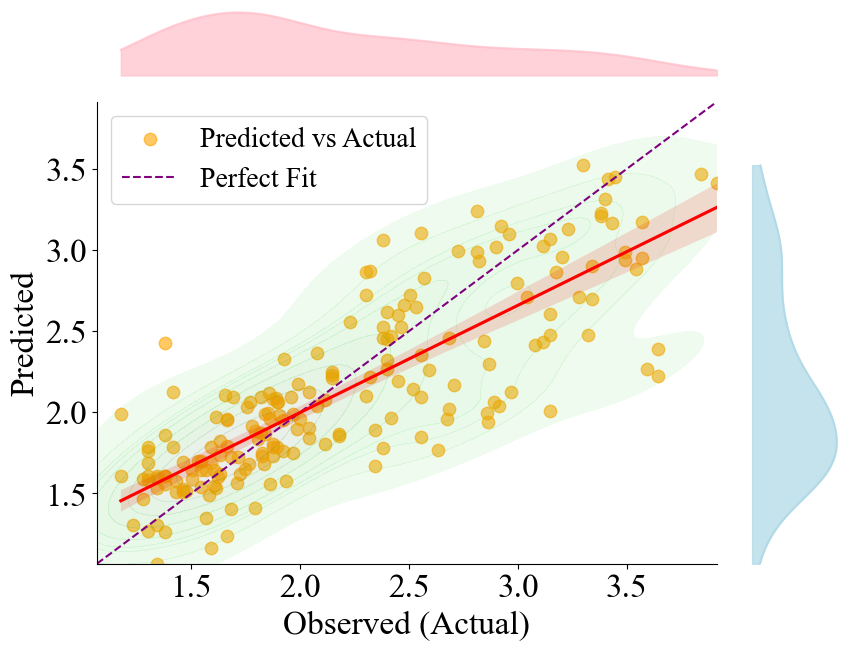

XGBoost Regression Evaluation Metrics
Train:
  R2: 0.959
  MAE: 0.096
  MSE: 0.015
  MAPE: 0.054
Test:
  R2: 0.667
  MAE: 0.296
  MSE: 0.159
  MAPE: 0.135


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn import metrics
from xgboost import XGBRegressor
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# === Model Setup ===
final_features = ['Turbidity', 'fractal_dimension_mn', 'month', 'seasonal_rainfall_deviation_lag1', 'cum_rain_4_days_lag1', 
                  'relative_mutual_information', 'Water Temperature', 'Antecedent_Wet_Period_lag1', 'time_diff_days_global.1', 'area_mn', 
                  'cum_rain_6_days_lag1']

Xtrain = X_train_log1p[final_features]
Xtest = X_test_log1p[final_features]

model = XGBRegressor(gamma=0.05, learning_rate=0.19, max_depth=3, subsample=0.6, n_estimators=226, random_state=42, n_jobs=-1) 

model.fit(Xtrain, y_train)

# Predictions
y_predict_xtrain = model.predict(Xtrain)
y_predict_xtest = model.predict(Xtest)

# Evaluation metrics
def regression_metrics(y_true, y_pred):
    return {
        "R2": metrics.r2_score(y_true, y_pred),
        "MAE": metrics.mean_absolute_error(y_true, y_pred),
        "MSE": metrics.mean_squared_error(y_true, y_pred),
        "MAPE": metrics.mean_absolute_percentage_error(y_true, y_pred)
    }

train_metrics = regression_metrics(y_train, y_predict_xtrain)
test_metrics = regression_metrics(y_test, y_predict_xtest)

# === DataFrame for visualization ===
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_predict_xtest
})

# === Plotting Setup ===
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 24

fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot
ax.scatter(results_df['Actual'], results_df['Predicted'],
           color='orange', alpha=0.6, s=80, label='Predicted vs Actual')

# Perfect Fit Line
min_val = min(results_df.min())
max_val = max(results_df.max())
ax.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='purple', label='Perfect Fit')

# Regression Fit Line
sns.regplot(x='Actual', y='Predicted', data=results_df,
            scatter=False, color="red", line_kws={"label": "Model Fit"}, ax=ax)

# KDE Contour
sns.kdeplot(
    x=results_df['Actual'], y=results_df['Predicted'],
    fill=True, alpha=0.1, levels=10, color='green', ax=ax
)

# Marginal KDE for Actual
x_kde = gaussian_kde(results_df['Actual'])
x_vals = np.linspace(results_df['Actual'].min(), results_df['Actual'].max(), 100)
x_kde_vals = x_kde(x_vals)

ax2 = ax.inset_axes([0, 1.05, 1, 0.15], sharex=ax)
ax2.plot(x_vals, x_kde_vals, color="pink", alpha=0.7)
ax2.fill_between(x_vals, 0, x_kde_vals, color="pink", alpha=0.7)
ax2.axis("off")

# Marginal KDE for Predicted
y_kde = gaussian_kde(results_df['Predicted'])
y_vals = np.linspace(results_df['Predicted'].min(), results_df['Predicted'].max(), 100)
y_kde_vals = y_kde(y_vals)

ax3 = ax.inset_axes([1.05, 0, 0.15, 1], sharey=ax)
ax3.plot(y_kde_vals, y_vals, color="lightblue", alpha=0.7)
ax3.fill_betweenx(y_vals, 0, y_kde_vals, color="lightblue", alpha=0.7)
ax3.axis("off")

# Labels and Legend
ax.set_xlabel("Observed (Actual)")
ax.set_ylabel("Predicted")
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper left', fontsize=20)

# Save and Show
plt.savefig("regression_observed_vs_predicted.png", dpi=600, bbox_inches='tight')
plt.show()

# === Print Evaluation Summary ===
print("XGBoost Regression Evaluation Metrics")
print("Train:")
for k, v in train_metrics.items():
    print(f"  {k}: {v:.3f}")
print("Test:")
for k, v in test_metrics.items():
    print(f"  {k}: {v:.3f}")


In [8]:
train_dates = train_set['Date'].reset_index(drop=True)
test_dates = test_set['Date'].reset_index(drop=True)


In [9]:
# Train predictions DataFrame
df_train_XGBoost_preds = pd.DataFrame({
    'Date': train_dates,
    'Observed_Train_Log10_Ecoli': y_train.reset_index(drop=True),
    'Predicted_Train_Log10_Ecoli': y_predict_xtrain
})

# Test predictions DataFrame
df_test_XGBoost_preds = pd.DataFrame({
    'Date': test_dates,
    'Observed_Test_Log10_Ecoli': y_test.reset_index(drop=True),
    'Predicted_Test_Log10_Ecoli': y_predict_xtest
})


In [10]:
df_train_XGBoost_preds.to_csv('XGBoost_train_predictions.csv', index=False)
df_test_XGBoost_preds.to_csv('XGBoost_test_predictions.csv', index=False)

In [11]:
df_train_XGBoost_preds['Set'] = 'Train'
df_test_XGBoost_preds['Set'] = 'Test'

df_XGBoost_all = pd.concat([
    df_train_XGBoost_preds.rename(columns={
        'Observed_Train_Log10_Ecoli': 'Observed_Log10_Ecoli',
        'Predicted_Train_Log10_Ecoli': 'Predicted_Log10_Ecoli'
    }),
    df_test_XGBoost_preds.rename(columns={
        'Observed_Test_Log10_Ecoli': 'Observed_Log10_Ecoli',
        'Predicted_Test_Log10_Ecoli': 'Predicted_Log10_Ecoli'
    })
], ignore_index=True)

df_XGBoost_all.to_csv('XGBoost_all_predictions.csv', index=False)


In [ ]:
# Features Interpretability

In [48]:
!pip install shap

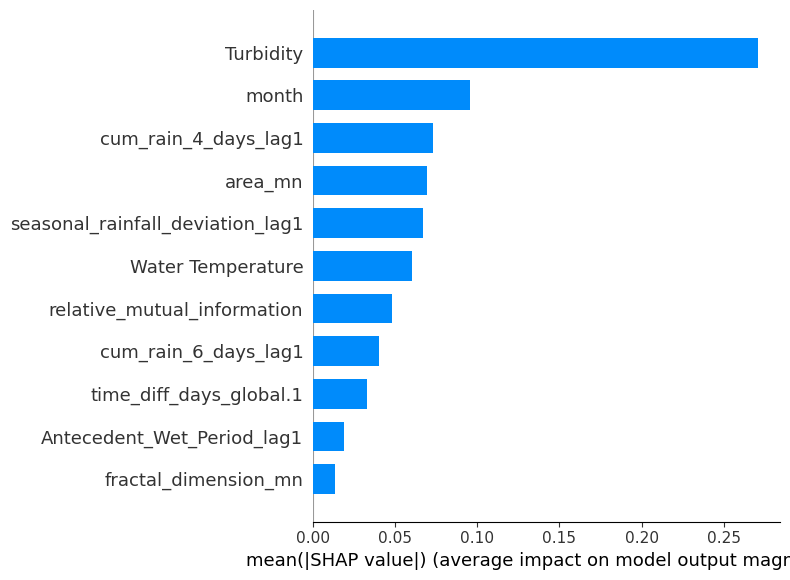

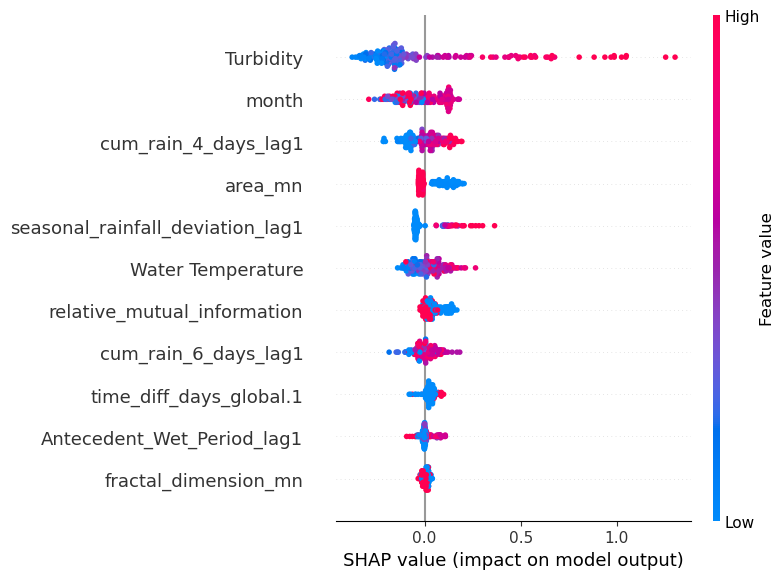

In [10]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP explainer
explainer = shap.Explainer(model, Xtrain)

# Calculate SHAP values for the test set
shap_values = explainer(Xtest)

# Plot SHAP summary for test data
shap.summary_plot(shap_values, Xtest, plot_type="bar")  # bar plot
shap.summary_plot(shap_values, Xtest)  # dot plot


<Figure size 1200x600 with 0 Axes>

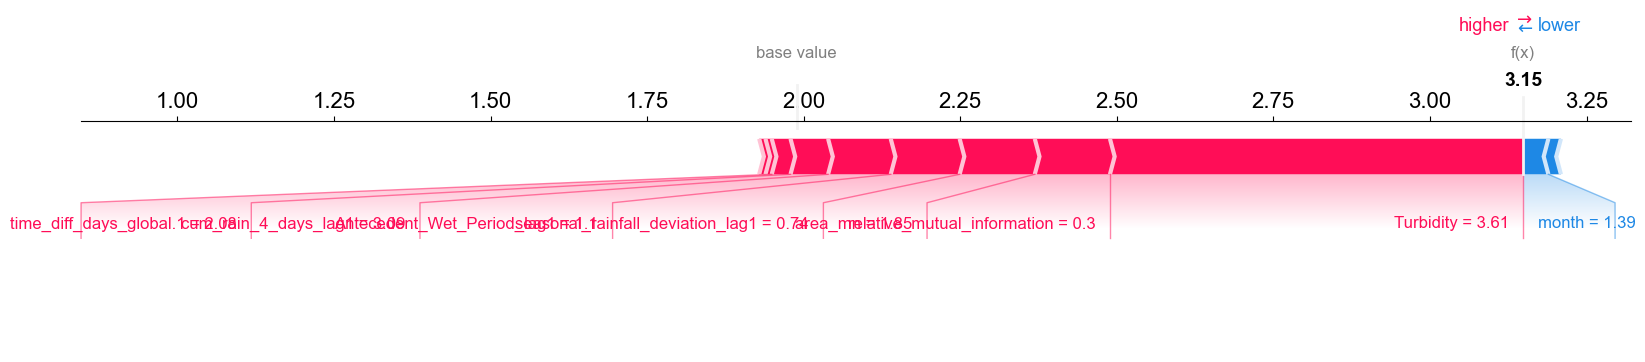

In [11]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font to Arial, size 16
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 16

# Create the SHAP explainer and SHAP values
#explainer = shap.Explainer(SV_R.predict, Xtest)
#shap_values = explainer(Xtest)

# Round SHAP values and input data to two decimal places (for the specific row)
rounded_shap_values = np.round(shap_values.values[29], 2)
rounded_input_data = Xtest.iloc[29].round(2)

# Increase plot size if necessary
plt.figure(figsize=(12, 6))

# Generate the force plot with rounded values using base_values from shap_values
shap.force_plot(shap_values.base_values[29], rounded_shap_values, rounded_input_data, matplotlib=True, show=False)

# Save the plot with 600 DPI
plt.savefig('TSS_Extreme_shap_force_plot_1.png', dpi=600, bbox_inches='tight')
plt.show()



PermutationExplainer explainer: 195it [00:25,  4.95it/s]                         


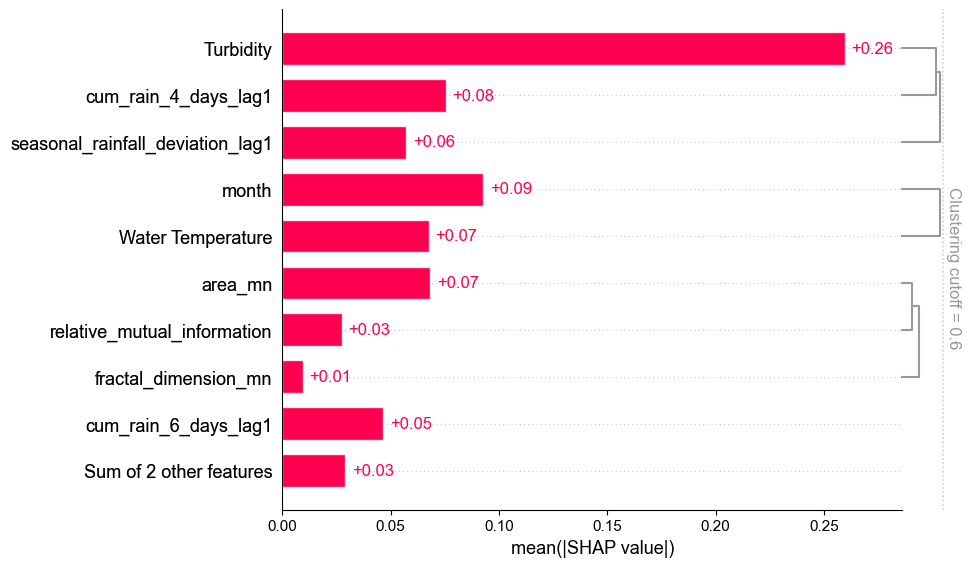

In [12]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Required to save the plot

# List of your feature names
feature_names =['Turbidity', 'fractal_dimension_mn', 'month', 'seasonal_rainfall_deviation_lag1', 'cum_rain_4_days_lag1', 
                  'relative_mutual_information', 'Water Temperature', 'Antecedent_Wet_Period_lag1', 'time_diff_days_global.1', 'area_mn', 
                  'cum_rain_6_days_lag1']

# Ensure Xtest is a DataFrame with proper feature names
if isinstance(Xtest, np.ndarray):
    Xtest = pd.DataFrame(Xtest, columns=feature_names)
else:
    Xtest.columns = feature_names

# Create the SHAP explainer and SHAP values if not already created
explainer = shap.Explainer(model.predict, Xtest)
shap_values = explainer(Xtest)

# Ensure base_values is correctly shaped
base_values = shap_values.base_values

# Create the SHAP Explanation object with feature names
shap_explanation = shap.Explanation(
    values=shap_values.values,
    base_values=base_values,
    data=Xtest.values,
    feature_names=feature_names
)

# Perform hierarchical clustering on SHAP values (use metric="correlation")
clustering = shap.utils.hclust(shap_values.values, metric="correlation")

# Generate the SHAP bar plot without displaying it immediately
shap.plots.bar(shap_explanation, clustering=clustering, clustering_cutoff=0.6, show=False)

# Save the plot as PNG with high DPI
plt.savefig('1_feature_plot_TSS_featureimp.png', dpi=600, bbox_inches='tight', format='png')

# Optionally, display the plot
plt.show()

# Close the figure to free up memory
plt.close()


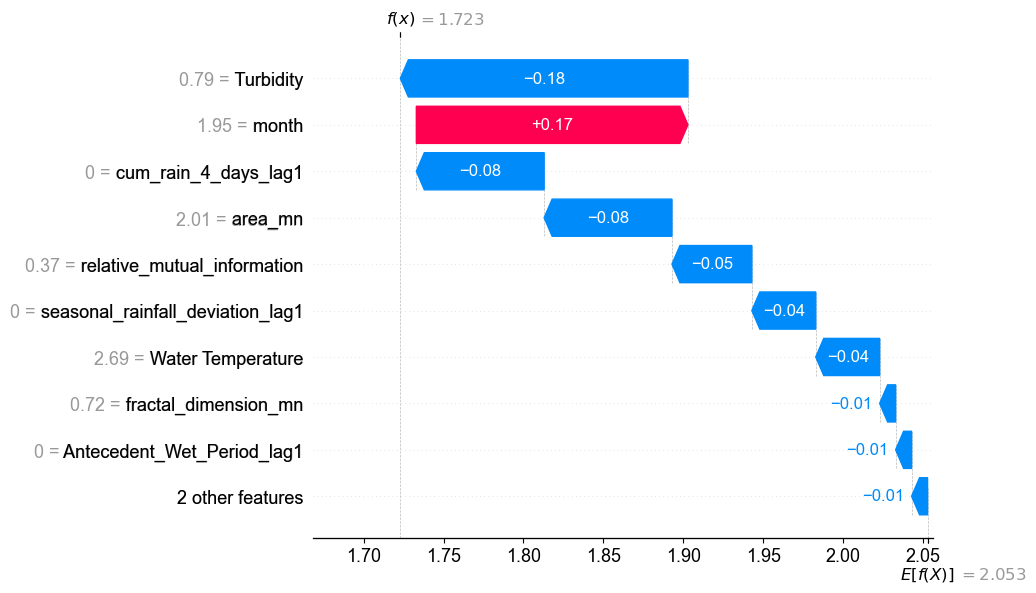

<Figure size 640x480 with 0 Axes>

In [13]:
import numpy as np
import shap
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font to Arial, size 16
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 16

# Assuming shap_values is already computed using the explainer
# Round SHAP values and input data to two decimal places (for the specific row)
rounded_shap_values = np.round(shap_values.values[57], 2)
rounded_base_value = shap_values.base_values[57]
rounded_input_data = Xtest.iloc[57].round(2)

# Create an Explanation object from rounded shap_values, base values, and the input data
shap_explanation = shap.Explanation(values=rounded_shap_values, 
                                    base_values=rounded_base_value, 
                                    data=rounded_input_data)

# Generate the waterfall plot using the Explanation object
shap.waterfall_plot(shap_explanation)

# Save the plot with 600 DPI (before calling plt.show())
plt.savefig('TSS_NearLow_shap_force_plot_1.jpeg', dpi=600, bbox_inches='tight')

# Optionally show the plot after saving it
plt.show()
